In [156]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import median_abs_deviation

import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
import IPython
IPython.display.clear_output()

In [158]:
sns.set_palette("pastel")

f = open("/content/open-meteo-45.52N73.75W226m.csv", "r")
raw_content = f.read().split("\n")  # Read as lines
header_row_index = next(i for i, line in enumerate(raw_content) if line.startswith("time,"))

df_weather = pd.read_csv("open-meteo-45.52N73.75W226m.csv", skiprows=header_row_index)
df_weather.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2005-01-01,53.0,6.2,-12.8,-2.6,0.8,-18.2,-8.1,2005-01-01T07:35,2005-01-01T16:22,...,18646.71,1.2,1.2,0.0,2.0,27.5,68.4,295.0,4.59,0.73
1,2005-01-02,75.0,-1.0,-18.2,-11.8,-4.3,-24.0,-16.8,2005-01-02T07:35,2005-01-02T16:23,...,829.22,9.9,4.9,3.5,9.0,14.2,59.8,45.0,2.15,0.28
2,2005-01-03,51.0,1.0,-6.4,-1.3,-2.3,-11.0,-5.5,2005-01-03T07:35,2005-01-03T16:24,...,18429.82,0.3,0.3,0.0,2.0,18.0,37.4,271.0,4.54,0.42
3,2005-01-04,3.0,-4.9,-9.9,-7.6,-9.7,-14.3,-12.2,2005-01-04T07:35,2005-01-04T16:25,...,20725.18,0.0,0.0,0.0,0.0,11.5,23.8,315.0,4.41,0.39
4,2005-01-05,3.0,-8.0,-19.2,-13.0,-12.9,-24.4,-17.9,2005-01-05T07:34,2005-01-05T16:26,...,27582.08,0.0,0.0,0.0,0.0,11.3,23.4,323.0,7.11,0.39


In [159]:
df_weather.columns

Index(['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
       'wind_gusts_10m_max (km/h)', 'wind_direction_10m_dominant (°)',
       'shortwave_radiation_sum (MJ/m²)', 'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [160]:
df_weather.dtypes

,0
time,object
weather_code (wmo code),float64
temperature_2m_max (°C),float64
temperature_2m_min (°C),float64
temperature_2m_mean (°C),float64
apparent_temperature_max (°C),float64
apparent_temperature_min (°C),float64
apparent_temperature_mean (°C),float64
sunrise (iso8601),object
sunset (iso8601),object


In [161]:
df_weather.isna().sum()

,0
time,0
weather_code (wmo code),2
temperature_2m_max (°C),2
temperature_2m_min (°C),2
temperature_2m_mean (°C),3
apparent_temperature_max (°C),2
apparent_temperature_min (°C),2
apparent_temperature_mean (°C),3
sunrise (iso8601),0
sunset (iso8601),0


In [162]:
df_weather = df_weather.filter([
  "time",
  "temperature_2m_max (°C)",
  "temperature_2m_min (°C)",
  "temperature_2m_mean (°C)",
  "precipitation_sum (mm)",
  "wind_speed_10m_max (km/h)",
  "wind_gusts_10m_max (km/h)"
  ],
axis=1)
df_weather = df_weather.rename(columns={
  'temperature_2m_max (°C)': 'temperature_max',
  'temperature_2m_min (°C)': 'temperature_min',
  'temperature_2m_mean (°C)': 'temperature_mean',
  'precipitation_sum (mm)': 'precipitation_sum',
  "wind_speed_10m_max (km/h)": "wind_speed_max",
  "wind_gusts_10m_max (km/h)": "wind_gusts_max"
})

df_weather.head()

,time,temperature_max,temperature_min,temperature_mean,precipitation_sum,wind_speed_max,wind_gusts_max
0,2005-01-01,6.2,-12.8,-2.6,1.2,27.5,68.4
1,2005-01-02,-1.0,-18.2,-11.8,9.9,14.2,59.8
2,2005-01-03,1.0,-6.4,-1.3,0.3,18.0,37.4
3,2005-01-04,-4.9,-9.9,-7.6,0.0,11.5,23.8
4,2005-01-05,-8.0,-19.2,-13.0,0.0,11.3,23.4


In [163]:
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather['year'] = df_weather['time'].dt.year
df_weather['month'] = df_weather['time'].dt.month
df_weather = df_weather.drop('time', axis=1)
df_weather = df_weather[df_weather['year'] < 2025]

df_weather_monthly = df_weather.groupby(['year', 'month']).agg({
  'temperature_max' : 'max',
  'temperature_min': 'min',
  'temperature_mean': 'mean',
  'precipitation_sum': 'sum',
  "wind_speed_max": "max",
  "wind_gusts_max": "max"
}).reset_index()

df_weather_monthly['temperature_mean'] = df_weather_monthly['temperature_mean'].round(1)

print(df_weather_monthly.shape)
df_weather_monthly.head()

(240, 8)


,year,month,temperature_max,temperature_min,temperature_mean,precipitation_sum,wind_speed_max,wind_gusts_max
0,2005,1,8.8,-31.6,-13.4,47.1,27.6,68.4
1,2005,2,3.6,-23.0,-8.4,52.2,26.3,56.9
2,2005,3,13.4,-19.9,-5.1,41.5,30.6,69.8
3,2005,4,20.1,-4.5,5.4,159.4,27.5,70.6
4,2005,5,23.1,-1.2,9.6,65.7,27.8,58.7


### Modified Z-Score Formula (Using MAD)

$$
MZ = \frac{0.6745 \times (X_i - \text{Median})}{\text{MAD}}
$$

$MZ>3.5$ → The point is an outlier.

In [164]:
def detect_outliers(data, threshold=3.5):
    median = np.median(data)
    mad = median_abs_deviation(data)
    mod_z_scores = 0.6745 * (data - median) / mad
    outliers = data[np.abs(mod_z_scores) > threshold]
    return outliers

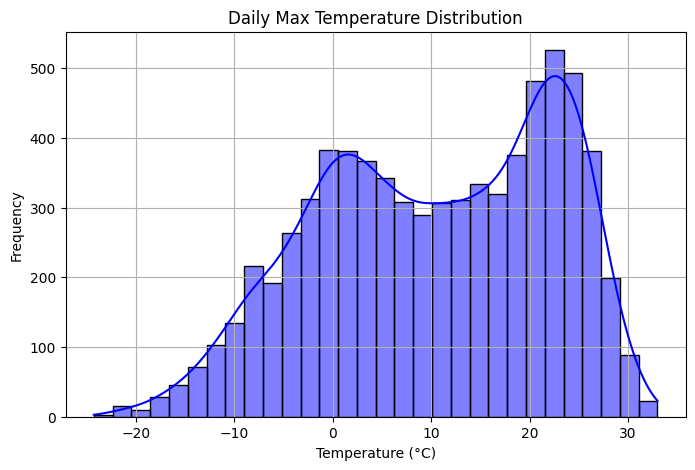

In [165]:
# --- ️Daily Max Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["temperature_max"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Daily Max Temperature Distribution")
plt.grid()
plt.show()

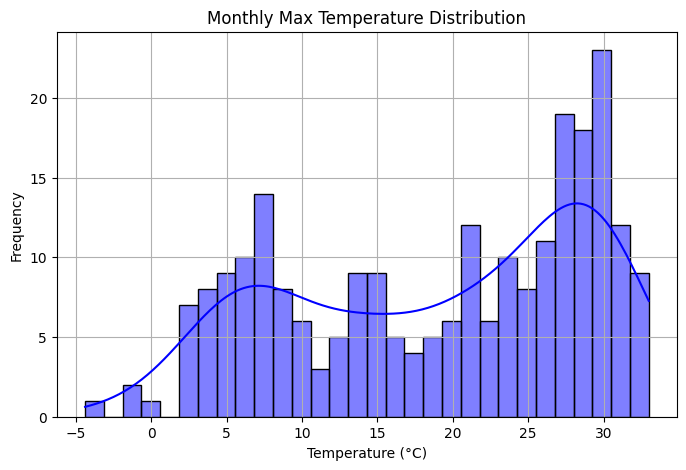

In [166]:
# --- ️Monthly Max Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather_monthly["temperature_max"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Monthly Max Temperature Distribution")
plt.grid()
plt.show()

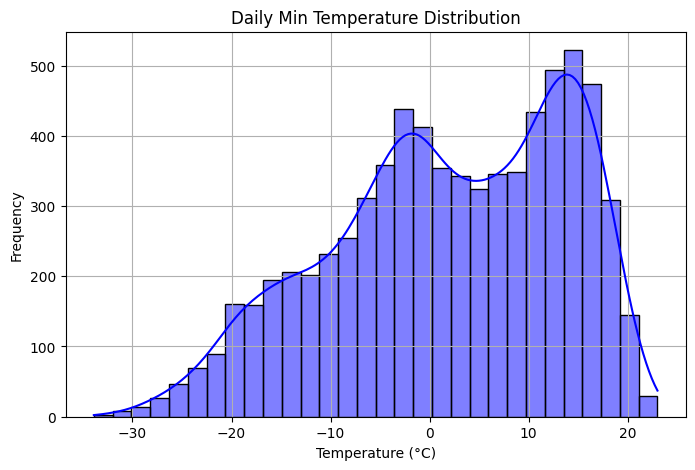

In [167]:
# --- Daily Min Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["temperature_min"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Daily Min Temperature Distribution")
plt.grid()
plt.show()

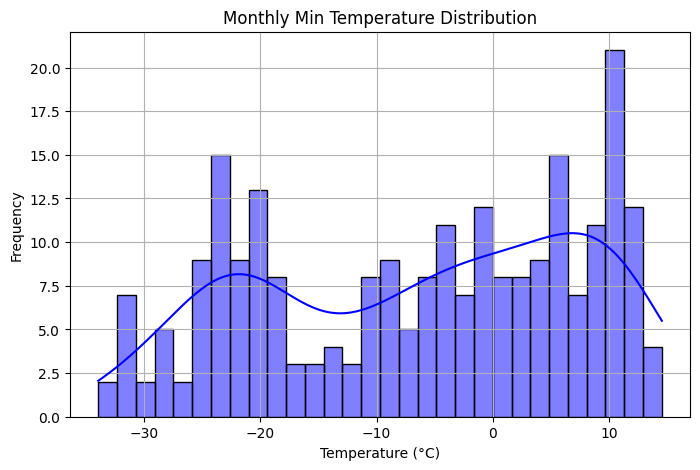

In [168]:
# --- Monthly Min Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather_monthly["temperature_min"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Monthly Min Temperature Distribution")
plt.grid()
plt.show()

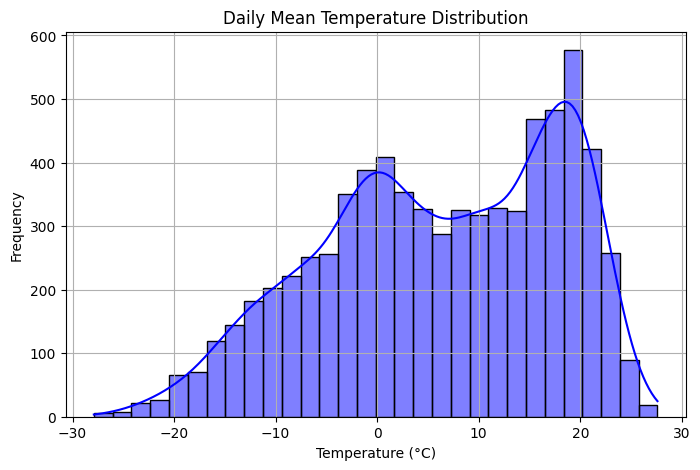

In [169]:
# --- Daily Mean Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["temperature_mean"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Daily Mean Temperature Distribution")
plt.grid()
plt.show()

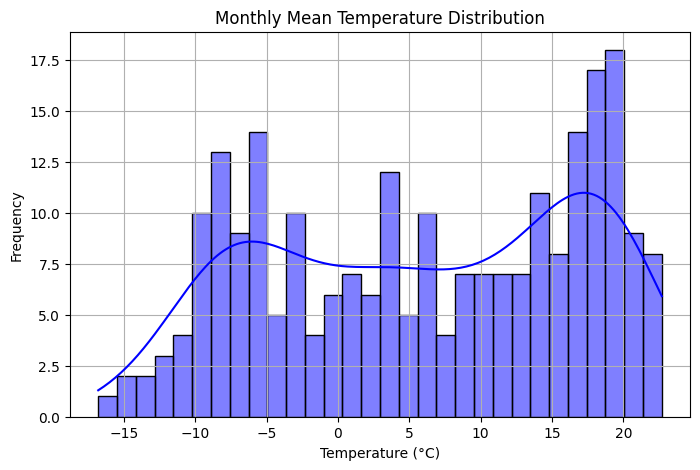

In [170]:
# --- Monthly Mean Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather_monthly["temperature_mean"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Monthly Mean Temperature Distribution")
plt.grid()
plt.show()

<ipython-input-171-4ec88b454543>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Max', 'Min', 'Mean'])


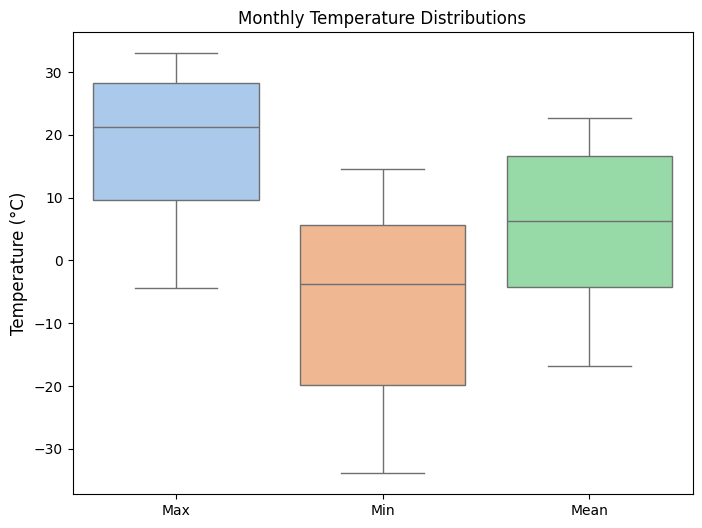

In [171]:
# Melt the DataFrame to long format
df_temps = df_weather_monthly.drop([
  "year",
  "month",
  "precipitation_sum",
  "wind_speed_max",
  "wind_gusts_max"
], axis=1)

# Create the boxplot
df_temps = df_temps.melt(var_name='Temperature Type', value_name='Temperature')

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set figure size
ax = sns.boxplot(x='Temperature Type', y='Temperature', data=df_temps, hue="Temperature Type")
ax.set_xticklabels(['Max', 'Min', 'Mean'])

# Customize the plot
plt.title('Monthly Temperature Distributions')
plt.xlabel(None)
plt.ylabel('Temperature (°C)', fontsize=12)

# Show the plot
plt.show()

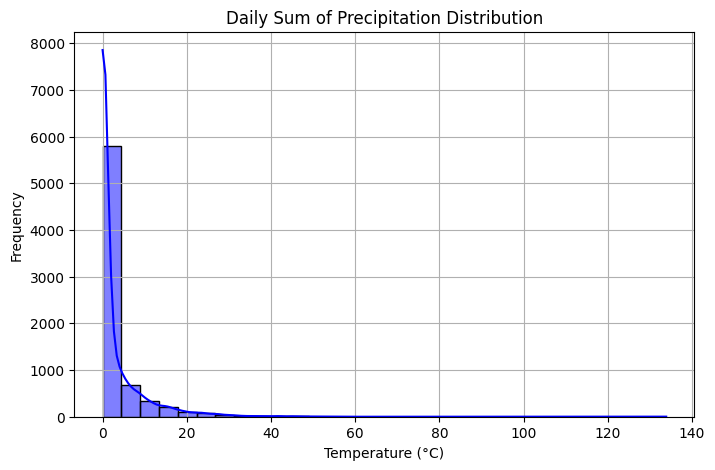

In [172]:
# --- Daily Sum of Precipitation Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["precipitation_sum"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Daily Sum of Precipitation Distribution")
plt.grid()
plt.show()

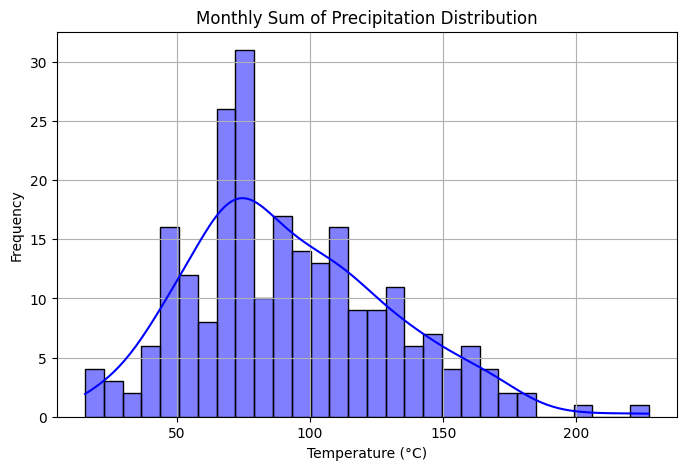

In [173]:
# --- Monthly Sum of Precipitation Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather_monthly["precipitation_sum"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Monthly Sum of Precipitation Distribution")
plt.grid()
plt.show()

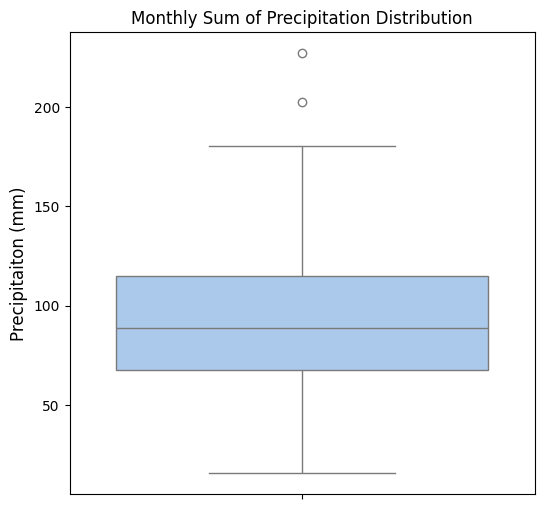

In [174]:
df_precipitation = df_weather_monthly['precipitation_sum']

# Create the boxplot
plt.figure(figsize=(6, 6))  # Set figure size
ax = sns.boxplot(data=df_precipitation)

# Customize the plot
plt.title('Monthly Sum of Precipitation Distribution')
plt.xlabel(None)
plt.ylabel('Precipitaiton (mm)', fontsize=12)

# Show the plot
plt.show()

In [175]:
detect_outliers(df_weather_monthly['precipitation_sum'])

,precipitation_sum
235,227.1


In [176]:
#df_weather_monthly['precipitation_sum'] = winsorize(df_weather_monthly['precipitation_sum'], limits=[0.01, 0.01])
#detect_outliers(df_weather_monthly['precipitation_sum'])

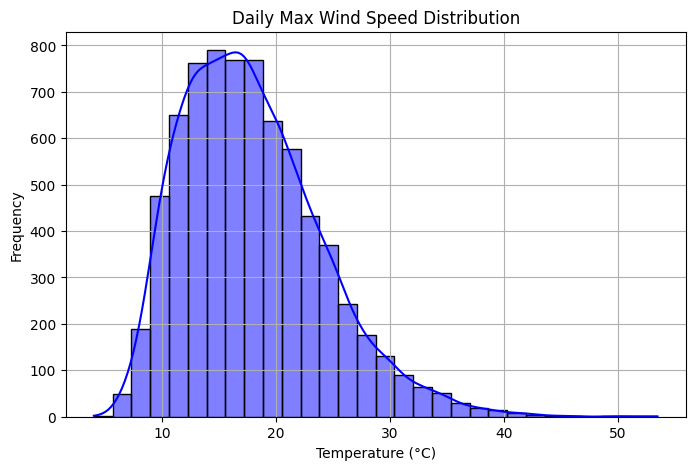

In [177]:
# --- Daily Max Wind Speed Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["wind_speed_max"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Daily Max Wind Speed Distribution")
plt.grid()
plt.show()

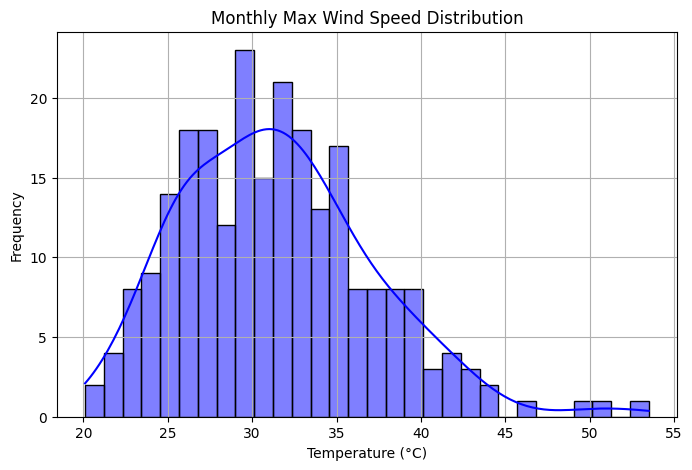

In [178]:
# --- Monthly Max Wind Speed Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather_monthly["wind_speed_max"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Monthly Max Wind Speed Distribution")
plt.grid()
plt.show()

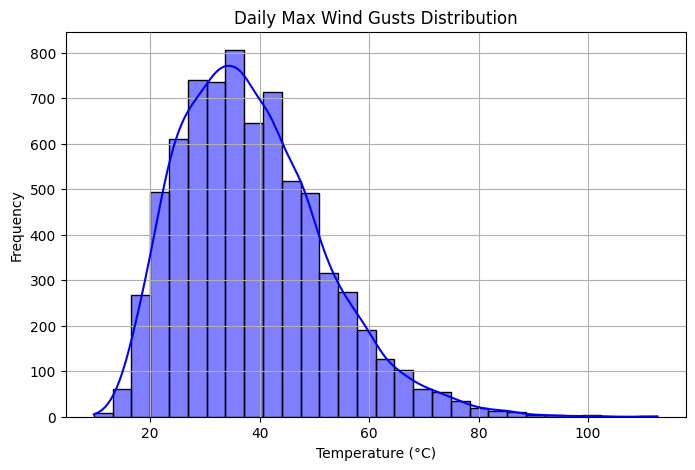

In [179]:
# --- Daily Max Wind Gusts Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["wind_gusts_max"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Daily Max Wind Gusts Distribution")
plt.grid()
plt.show()

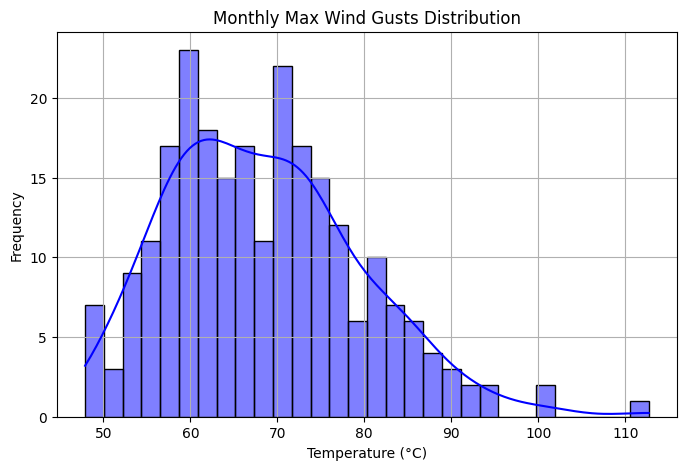

In [180]:
# --- Monthly Max Wind Gusts Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather_monthly["wind_gusts_max"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Monthly Max Wind Gusts Distribution")
plt.grid()
plt.show()

<ipython-input-181-3c2369418726>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['speed', 'gusts'])


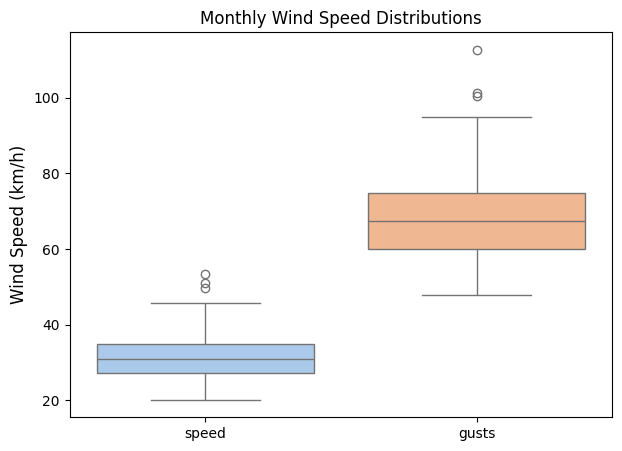

In [181]:
# Melt the DataFrame to long format
df_wind = df_weather_monthly.drop([
  "year",
  "month",
  "temperature_max",
  "temperature_min",
  "temperature_mean",
  "precipitation_sum",
], axis=1)

# Create the boxplot
df_wind = df_wind.melt(var_name='Wind Type', value_name='Wind Speed')

# Create the boxplot
plt.figure(figsize=(7, 5))  # Set figure size
ax = sns.boxplot(x='Wind Type', y='Wind Speed', data=df_wind, hue="Wind Type")
ax.set_xticklabels(['speed', 'gusts'])

# Customize the plot
plt.title('Monthly Wind Speed Distributions')
plt.xlabel(None)
plt.ylabel('Wind Speed (km/h)', fontsize=12)

# Show the plot
plt.show()

In [182]:
detect_outliers(df_weather_monthly['wind_speed_max'])

,wind_speed_max
160,51.1
178,53.5


In [183]:
#df_weather_monthly['wind_speed_max'] = winsorize(df_weather_monthly['wind_speed_max'], limits=[0.01, 0.01])
#detect_outliers(df_weather_monthly['wind_speed_max'])

In [184]:
detect_outliers(df_weather_monthly['wind_gusts_max'])

,wind_gusts_max
178,112.7


In [185]:
#df_weather_monthly['wind_gusts_max'] = winsorize(df_weather_monthly['wind_gusts_max'], limits=[0.01, 0.01])
#detect_outliers(df_weather_monthly['wind_gusts_max'])

In [186]:
df_weather_monthly.to_csv('weather-clean.csv', index=False)